<a href="https://colab.research.google.com/github/thienan99dt/TrafficSignDetection/blob/master/TrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Flatten, Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
PATH = '/content/drive/My Drive/TrafficSign/'
data_folder = PATH + 'data'

In [0]:
#!unzip -q /content/drive/My\ Drive/TrafficSign/traffic-signs-data.zip -d $data_folder

In [0]:
train_link = data_folder + '/train.p'
valid_link = data_folder + '/valid.p'
test_link = data_folder + '/test.p'

In [0]:
import pickle

with open(train_link, mode="rb") as f:
  train = pickle.load(f)

with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)
  
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [64]:
train['labels'][:10]

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41], dtype=uint8)

In [0]:
X_train, y_train, X_valid, y_valid = train['features']/255.0, train['labels'], valid['features']/255.0, valid['labels']
X_test, y_test = test['features']/255.0, test['labels']

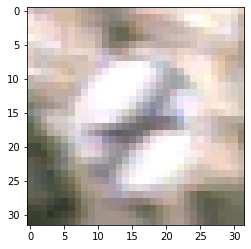

In [67]:
plt.imshow(X_train[39])

In [68]:
np.array(X_train[39]).shape

(32, 32, 3)

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [101]:
class_names.values()

dict_values(['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric to

In [0]:
class_names = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [0]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_valid, y_valid = shuffle(X_valid, y_valid)

X_test, y_test = shuffle(X_test, y_test)

In [72]:
class_names[y_train[4]]

'Speed limit (100km/h)'

In [0]:
labels = [v for k,v in class_names.items()]

In [0]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_valid = lb.fit_transform(y_valid)
y_test = lb.fit_transform(y_test)


In [0]:
width = 32
height= 32
num_classes = len(class_names)
input_shape = (width,height,3)

In [0]:
aug = ImageDataGenerator(rotation_range=15, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

In [196]:
model = Sequential()
model.add(Conv2D(28, 6, padding="same", activation = 'relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(10, 6, padding="same", activation = 'relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 28)        3052      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 28)        112       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 28)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 10)        10090     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 10)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

In [0]:
batch_size = 128
num_epochs = 15

In [198]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size), epochs=num_epochs, steps_per_epoch=X_train.shape[0]//batch_size, validation_data=(X_valid,y_valid),verbose =1)

Epoch 1/15
271/271 [==============================] - 25s 92ms/step - loss: 2.6529 - acc: 0.2666 - val_loss: 3.1598 - val_acc: 0.1599
Epoch 2/15
271/271 [==============================] - 24s 89ms/step - loss: 1.5906 - acc: 0.4981 - val_loss: 1.8230 - val_acc: 0.4417
Epoch 3/15
271/271 [==============================] - 24s 88ms/step - loss: 1.2228 - acc: 0.6026 - val_loss: 1.4896 - val_acc: 0.5481
Epoch 4/15
271/271 [==============================] - 24s 88ms/step - loss: 1.0131 - acc: 0.6642 - val_loss: 1.4548 - val_acc: 0.5764
Epoch 5/15
271/271 [==============================] - 24s 88ms/step - loss: 0.8671 - acc: 0.7117 - val_loss: 1.4752 - val_acc: 0.6014
Epoch 6/15
271/271 [==============================] - 24s 88ms/step - loss: 0.7574 - acc: 0.7439 - val_loss: 1.1831 - val_acc: 0.6576
Epoch 7/15
271/271 [==============================] - 24s 88ms/step - loss: 0.6730 - acc: 0.7704 - val_loss: 1.2209 - val_acc: 0.6361
Epoch 8/15
271/271 [==============================] - 24s 88ms

In [0]:
predictions = model.predict_classes(X_test, batch_size = batch_size)

In [200]:
predictions

array([ 8,  5, 16, ..., 13, 17, 11])

In [201]:
print(classification_report(y_test.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       0.41      0.35      0.38        60
           1       0.63      0.86      0.72       720
           2       0.77      0.68      0.72       750
           3       0.88      0.47      0.61       450
           4       0.68      0.90      0.77       660
           5       0.63      0.44      0.52       630
           6       0.65      0.65      0.65       150
           7       0.65      0.67      0.66       450
           8       0.64      0.73      0.68       450
           9       0.96      0.93      0.94       480
          10       0.87      0.92      0.89       660
          11       0.89      0.88      0.88       420
          12       0.94      0.91      0.92       690
          13       0.99      0.95      0.97       720
          14       0.95      0.97      0.96       270
          15       0.99      0.97      0.98       210
          16       0.99      0.99      0.99       150
          17       0.97    

In [202]:
len(X_test)

12630

9

My prediction:  Turn right ahead


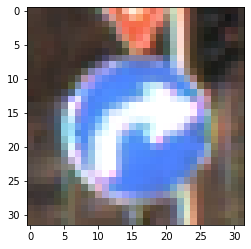

In [213]:
i = 1234
result1 = model.predict_classes(X_test[i:i+1])
plt.imshow(X_test[i], cmap = plt.cm.binary)
print("My prediction: ",labels[int(result1)])

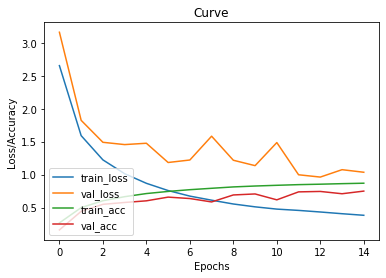

In [206]:
n = np.arange(0, num_epochs)
plt.plot(n, history.history["loss"], label="train_loss")
plt.plot(n, history.history["val_loss"], label="val_loss")
plt.plot(n, history.history["acc"], label="train_acc")
plt.plot(n, history.history["val_acc"], label="val_acc")
plt.title("Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")